In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt
import decimal

import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
from matplotlib.lines import Line2D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
hmdsetup.HMDSetup(oliba_wd='/home/adria/test/cat_test',
                  chain=1,
                  protein='CPEB4',
                  debye=0.1,
                  temperature=300,
                  slab=False,
                  model='HPS-cat').write_hps_files()
                  

300 300


In [24]:
t = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS/WT')

> Run Completed at 88.03% for CPEB4_alpha. Ran 880320000 steps for a total of 88033 frames 
> Taking frames every None for a total of [88405, 87745, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations


In [33]:
def save_pdb(self, display=False):
    header = f'CRYST1     {300:.0f}     {300:.0f}     {300:.0f}     90     90     90   \n'
    xyz = ''
    c = 0
    for n in range(self.chains):
        for i, aa in enumerate(self.sequence):
            coords = self.structures[-1].xyz[0, c, :]
            coords = coords + [300/2, 300/2, 300/2]
            if display:
                if self.residue_dict[aa]["q"] > 0:
                    res_name = 'C' if display == 'charged' else 'P'
                elif self.residue_dict[aa]["q"] < 0:
                    res_name = 'C' if display == 'charged' else 'M'
                else:
                    res_name = 'N'
            else:
                res_name = self.residue_dict[aa]["name"]
            tag = "CA"
            xyz += f'ATOM  {c + 1:>5}{tag:>4}  {res_name} {chr(65+n)} {i + 1:>3}    {coords[0]:>8.2f}{coords[1]:>8.2f}{coords[2]:>8.2f}  1.00  0.00      C \n'
            c += 1
    bonds = ''
    bottom = 'END \n'
    return header + xyz + bonds + bottom
strpdb = save_pdb(t)
with open("/home/adria/CPEB4_extended-v2.pdb", 'w+') as pdb:
    pdb.write(strpdb)

In [15]:
csptm = 'MRGKVKWFDSKKGYGFITKDEGGDVFVHWSAIEMEGFKTLKEGQVVEFEIQEGKKGPQAAHVKVVE'
integrase='CFLDGIDKAQEEHEKYHSNWRAMASDFNLPPVVAKGIVASCDKCQLKGEAMHGQVDC'
protan='GPSDAAVDTSSEITTKDLKEKKEVVEEAENGRDAPANGNAENEENGEQEADNEVDEECEEGGEEEEEEEEGDGEEEDGDEDEEAESATGKRAAEDDEDDDVDTKKQKTDEDD'
protac='MAHHHHHHSAALEVLFQGPMSDAAVDTSSEITTKDLKEKKEVVEEAENGRDAPANGNANEENGEQEADNEVDEECEEGGEEEEEEEEGDGEEEDGDEDEEAESATGKRAAEDDEDDDVDTKKQKTDEDD'
r15='KLKEANKQQNFNTGIKDFDFWLSEVEALLASEDYGKDLASVNNLLKKHQLLEADISAHEDRLKDLNSQADSLMTSSAFDTSQVKDKRETINGRFQRIKSMAAARRAKLNESHRL'
r17='RLEESLEYQQFVANVEEEEAWINEKMTLVASEDYGDTLAAIQGLLKKHEAFETDFTVHKDRVNDVAANGEDLIKKNNHHVENITAKMKGLKGKVSDLEKA'
hcyp='SSFHRIIPGFMSQGGDFTRHNGTGGKSIYGEKFEDENFILKHTGPGILSMANAGPNTNGSQFFISTAKTEFLDGKHVVFGKVKEGMNIVEAMERFGSRNGKTSKKITIADSGQLE'
proteinl='MEEVTIKANLIFANGSTQTAEFKGTFEKATSEAYAYADTLKKDNGEWTVDVADKGYTLNIKFAG'
ACTR='GTQNRPLLRNSLDDLVGPPSNLEGQSDERALLDQLHTLLSNTDATGLEEIDRALGIPELVNQGQALEPKQD'
hnhe1cdt='MVPAHKLDSPTMSRARIGSDPLAYEPKEDLPVITIDPASPQSPESVDLVNEELKGKVLGLSRDPAKVAEEDEDDDGGIMMRSKETSSPGTDDVFTPAPSDSPSSQRIQRCLSDPGPHPEPGEGEPFFPKGQ'
sNase='ATSTKKLHKEPATLIKAIDGDTVKLMYKGQPMTFRLLLVDTPETKHPKKGVEKYGPEASAFTKKMVENAKKIEVEFDKGQRTDKYGRGLAYIYADGKMVNEALVRQGLAKVAYVYKPNNTHEQHLRKSEAQAKKEK'
asyn='MDVFMKGISKAKEGVVAAAEKTKQGVAEAAGKTKEGVIYVGSKTKEGVVHGVATVAEKTKEQVTNVGGAVVTGVTAVAQKTVEGAGSLAAATGFVKKDQIGKNEEGAPQEGIIEDMPVDPDNEAYEMPSEEGYQDYEPEA'

seqs = [csptm, integrase, protan, protac, r15, r17, hcyp, proteinl, ACTR, hnhe1cdt, sNase, asyn]
seqs_n = ["csptm", "integrase", "protan", "protac", "r15", "r17", "hcyp", "proteinl", "ACTR", "hnhe1cdt", "sNase", "asyn"]
published = [
    0.676,
    0.648,
    0.555,
    0.573,
    0.616,
    0.647,
    0.679,
    0.682,
    0.644,
    0.671,
    0.659,
    0.659,
]

In [23]:
d = {'A': {'id': 1, 'name': 'ALA', 'mass': 71.0800018, 'q': 0.0, 'type': 'hydrophobic', 'lambda': 0.7297297297297297, 'sigma': 5.04}, 'R': {'id': 2, 'name': 'ARG', 'mass': 156.2, 'q': 1.0, 'type': 'charged', 'lambda': 0.0, 'sigma': 6.56}, 'N': {'id': 3, 'name': 'ASN', 'mass': 114.099998, 'q': 0.0, 'type': 'polar', 'lambda': 0.43243243243243246, 'sigma': 5.68}, 'D': {'id': 4, 'name': 'ASP', 'mass': 115.099998, 'q': -1.0, 'type': 'charged', 'lambda': 0.3783783783783784, 'sigma': 5.58}, 'C': {'id': 5, 'name': 'CYS', 'mass': 103.1, 'q': 0.0, 'type': 'other', 'lambda': 0.5945945945945946, 'sigma': 5.48}, 'Q': {'id': 6, 'name': 'GLN', 'mass': 128.100006, 'q': 0.0, 'type': 'polar', 'lambda': 0.5135135135135135, 'sigma': 6.02}, 'E': {'id': 7, 'name': 'GLU', 'mass': 129.100006, 'q': -1.0, 'type': 'charged', 'lambda': 0.4594594594594595, 'sigma': 5.92}, 'G': {'id': 8, 'name': 'GLY', 'mass': 57.0499992, 'q': 0.0, 'type': 'other', 'lambda': 0.6486486486486487, 'sigma': 4.5}, 'H': {'id': 9, 'name': 'HIS', 'mass': 137.100006, 'q': 0.5, 'type': 'aromatic', 'lambda': 0.5135135135135135, 'sigma': 6.08}, 'I': {'id': 10, 'name': 'ILE', 'mass': 113.199997, 'q': 0.0, 'type': 'hydrophobic', 'lambda': 0.972972972972973, 'sigma': 6.18}, 'L': {'id': 11, 'name': 'LEU', 'mass': 113.199997, 'q': 0.0, 'type': 'hydrophobic', 'lambda': 0.972972972972973, 'sigma': 6.18}, 'K': {'id': 12, 'name': 'LYS', 'mass': 128.199997, 'q': 1.0, 'type': 'charged', 'lambda': 0.5135135135135135, 'sigma': 6.36}, 'M': {'id': 13, 'name': 'MET', 'mass': 131.199997, 'q': 0.0, 'type': 'hydrophobic', 'lambda': 0.8378378378378378, 'sigma': 6.18}, 'F': {'id': 14, 'name': 'PHE', 'mass': 147.199997, 'q': 0.0, 'type': 'aromatic', 'lambda': 1.0, 'sigma': 6.36}, 'P': {'id': 15, 'name': 'PRO', 'mass': 97.1200027, 'q': 0.0, 'type': 'other', 'lambda': 1.0, 'sigma': 5.56}, 'S': {'id': 16, 'name': 'SER', 'mass': 87.0800018, 'q': 0.0, 'type': 'polar', 'lambda': 0.5945945945945946, 'sigma': 5.18}, 'T': {'id': 17, 'name': 'THR', 'mass': 101.099998, 'q': 0.0, 'type': 'polar', 'lambda': 0.6756756756756757, 'sigma': 5.62}, 'W': {'id': 18, 'name': 'TRP', 'mass': 186.199999, 'q': 0.0, 'type': 'aromatic', 'lambda': 0.9459459459459459, 'sigma': 6.78}, 'Y': {'id': 19, 'name': 'TYR', 'mass': 163.199997, 'q': 0.0, 'type': 'aromatic', 'lambda': 0.8648648648648649, 'sigma': 6.46}, 'V': {'id': 20, 'name': 'VAL', 'mass': 99.0699997, 'q': 0.0, 'type': 'hydrophobic', 'lambda': 0.8918918918918919, 'sigma': 5.86}}
print("PROT",        "MINE",        "PUBLISHED")
for i, s in enumerate(seqs):
    h1 = []
    h2 = 0
    for aa in s:
        h1.append(d[aa]["lambda"])
        h2 += d[aa]["lambda"]
    h1 = np.array(h1)
    h2/= len(s)
    print(seqs_n[i], round(h1.mean(),4), published[i])

PROT MINE PUBLISHED
csptm 0.6749 0.676
integrase 0.6543 0.648
protan 0.5401 0.555
protac 0.5611 0.573
r15 0.6169 0.616
r17 0.6419 0.647
hcyp 0.6644 0.679
proteinl 0.6782 0.682
ACTR 0.6467 0.644
hnhe1cdt 0.668 0.671
sNase 0.6574 0.659
asyn 0.6743 0.659


In [2]:
t = hmd.HMD(md_dir='/home/adria/irb/hoomd/protan', equil_frames=10)
t.rg()

(array([44.73528294]), array([0.21864415]))

In [20]:
t = lmp.LMP(md_dir='/home/adria/test/hps_test/0.ProTa-N', equil_frames=10)
t.rg()

> Run Completed at 1.65% for None. Ran 16490000 steps for a total of 1650 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations


(array([44.52889931]), array([0.77686206]))

In [9]:
for aa in d:
    inf = d[aa]
    print(inf["name"], round(inf["mass"],2), inf["q"], inf["sigma"], inf["lambda"])

ALA 71.08 0.0 5.04 0.72973
ARG 156.2 1.0 6.56 0.0
ASN 114.1 0.0 5.68 0.432432
ASP 115.1 -1.0 5.58 0.378378
CYS 103.1 0.0 5.48 0.594595
GLN 128.1 0.0 6.02 0.513514
GLU 129.1 -1.0 5.92 0.459459
GLY 57.05 0.0 4.5 0.648649
HIS 137.1 0.5 6.08 0.513514
ILE 113.2 0.0 6.18 0.972973
LEU 113.2 0.0 6.18 0.972973
LYS 128.2 1.0 6.36 0.513514
MET 131.2 0.0 6.18 0.837838
PHE 147.2 0.0 6.36 1.0
PRO 97.12 0.0 5.56 1.0
SER 87.08 0.0 5.18 0.594595
THR 101.1 0.0 5.62 0.675676
TRP 186.2 0.0 6.78 0.945946
TYR 163.2 0.0 6.46 0.864865
VAL 99.07 0.0 5.86 0.891892


In [3]:
s = hmdsetup.HMDSetup(oliba_wd=f'/home/adria/irb/hoomd/protan',
                     temperature=298,
                     debye=0.67,
                     protein='ProTa-N',
                     model='HPS',
                     t=int(1e9),
                     processors=2,
                     chains=1,
                     save=10000).write_hps_files()

298 298


In [3]:
prots = ['ProTa-N', 'ProTa-C']
Is = np.array([42,42])*10**-3
for i in range(len(prots)):
    print(f"DOING {prots[i]}")
    s = lmpsetup.LMPSetup(oliba_wd=f'/home/adria/test/hps_test/{i}.{prots[i]}',
                     temperatures=[298],
                     ionic_strength=Is[i],
                     protein=prots[i],
                     model='HPS',
                     t=int(1e9),
                     processors=2,
                     chains=1,
                     save=10000)
    s.del_missing_aas()
    s.lammps_ordering()
    s.write_hps_files(qsub=False, silent=True)

DOING ProTa-N
DOING ProTa-C


In [17]:
lambdas  = {
"I": 0.972973,
"V": 0.891892,
"L": 0.972973,
"F": 1.0,
"C": 0.594595,
"M": 0.837838,
"A": 0.72973,
"G": 0.648649,
"T": 0.675676,
"S": 0.594595,
"W": 0.945946,
"Y": 0.864865,
"P": 1.0,
"H": 0.513514,
"E": 0.459459,
"Q": 0.513514,
"D": 0.378378,
"N": 0.432432,
"K": 0.513514,
"R": 0.0}

l=[]


protan = "GPSDAAVDTSSEITTKDLKEKKEVVEEAENGRDAPANGNAENEENGEQEADNEVDEECEEGGEEEEEEEEGDGEEEDGDEDEEAESATGKRAAEDDEDDDVDTKKQKTDEDD"
protan = "GPSDAAVDTSSEITTKDLKEKKEVVEEAENGRDAPANGNAENEENGEQEADNEVDEECEEGGEEEEEEEEGDGEEEDGDEDEEAESATGKRAAEDDEDDDVDTKKQKTDEDD"
for aa in protan:
    print(aa,lambdas[aa])
    l.append(lambdas[aa])
print("PROTANMEAN", np.array(l).mean(), 0.555)

G 0.648649
P 1.0
S 0.594595
D 0.378378
A 0.72973
A 0.72973
V 0.891892
D 0.378378
T 0.675676
S 0.594595
S 0.594595
E 0.459459
I 0.972973
T 0.675676
T 0.675676
K 0.513514
D 0.378378
L 0.972973
K 0.513514
E 0.459459
K 0.513514
K 0.513514
E 0.459459
V 0.891892
V 0.891892
E 0.459459
E 0.459459
A 0.72973
E 0.459459
N 0.432432
G 0.648649
R 0.0
D 0.378378
A 0.72973
P 1.0
A 0.72973
N 0.432432
G 0.648649
N 0.432432
A 0.72973
E 0.459459
N 0.432432
E 0.459459
E 0.459459
N 0.432432
G 0.648649
E 0.459459
Q 0.513514
E 0.459459
A 0.72973
D 0.378378
N 0.432432
E 0.459459
V 0.891892
D 0.378378
E 0.459459
E 0.459459
C 0.594595
E 0.459459
E 0.459459
G 0.648649
G 0.648649
E 0.459459
E 0.459459
E 0.459459
E 0.459459
E 0.459459
E 0.459459
E 0.459459
E 0.459459
G 0.648649
D 0.378378
G 0.648649
E 0.459459
E 0.459459
E 0.459459
D 0.378378
G 0.648649
D 0.378378
E 0.459459
D 0.378378
E 0.459459
E 0.459459
A 0.72973
E 0.459459
S 0.594595
A 0.72973
T 0.675676
G 0.648649
K 0.513514
R 0.0
A 0.72973
A 0.72973
E 0.4594

In [111]:
t = lmp.LMP(md_dir=None)
lambs = {}
# with open('/home/adria/scripts/data/hps/lambdas_old.dat','r') as lambdas:
with open('/home/adria/scripts/data/hps/lambdas.dat','r') as lambdas:
    for line in lambdas.readlines():
        ls = line.split()
        lambs[ls[0]] = ls[1]
lambs
protan = "GPSDAAVDTSSEITTKDLKEKKEVVEEAENGRDAPANGNAENEENGEQEADNEVDEECEEGGEEEEEEEEGDGEEEDGDEDEEAESATGKRAAEDDEDDDVDTKKQKTDEDD"
l = []
for aa in protan:
    l.append( float(lambs[t.residue_dict[aa]["name"]]))
print("PROTANMEAN", round(np.array(l).mean(),3), 0.555)

asyn = "MDVFMKGISKAKEGVVAAAEKTKQGVAEAAGKTKEGVIYVGSKTKEGVVHGVATVAEKTKEQVTNVGGAVVTGVTAVAQKTVEGAGSLAAATGFVKKDQIGKNEEGAPQEGIIEDMPVDPDNEAYEMPSEEGYQDYEPEA"
l = []
for aa in asyn:
    l.append( float(lambs[t.residue_dict[aa]["name"]]))
print("ASYNMEAN", round(np.array(l).mean(),3), 0.678)


PROTANMEAN 0.54 0.555
ASYNMEAN 0.674 0.678


In [59]:
aas = ['ALA','ARG','ASN','ASP','CYS','GLU','GLN','GLY','HIS','ILE','LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL',]
with open('/home/adria/scripts/data/hps/lambdas_test.dat','r') as lambdas:
    for line in lambdas.readlines():
        ls = line.split()
        lambs[ls[0]] = ls[1]
df = pd.DataFrame(columns=aas, index=aas)
for i in range(len(aas)):
    for j in range(i, len(aas)):
        df[aas[i]][aas[j]]=round((float(lambs[aas[i]])+float(lambs[aas[j]]))/2,6)
        df[aas[j]][aas[i]]=round((float(lambs[aas[i]])+float(lambs[aas[j]]))/2,6)
        
df

,ALA,ARG,ASN,ASP,CYS,GLU,GLN,GLY,HIS,ILE,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
ALA,0.72973,0.364865,0.581081,0.554054,0.662162,0.594595,0.621622,0.689189,0.621622,0.851351,0.851351,0.621622,0.783784,0.864865,0.864865,0.662162,0.702703,0.837838,0.797297,0.810811
ARG,0.364865,0,0.216216,0.189189,0.297297,0.22973,0.256757,0.324324,0.256757,0.486486,0.486486,0.256757,0.418919,0.5,0.5,0.297297,0.337838,0.472973,0.432432,0.445946
ASN,0.581081,0.216216,0.432432,0.405405,0.513514,0.445946,0.472973,0.540541,0.472973,0.702703,0.702703,0.472973,0.635135,0.716216,0.716216,0.513514,0.554054,0.689189,0.648649,0.662162
ASP,0.554054,0.189189,0.405405,0.378378,0.486486,0.418919,0.445946,0.513514,0.445946,0.675676,0.675676,0.445946,0.608108,0.689189,0.689189,0.486486,0.527027,0.662162,0.621622,0.635135
CYS,0.662162,0.297297,0.513514,0.486486,0.594595,0.527027,0.554054,0.621622,0.554054,0.783784,0.783784,0.554054,0.716216,0.797297,0.797297,0.594595,0.635135,0.77027,0.72973,0.743243
GLU,0.594595,0.22973,0.445946,0.418919,0.527027,0.459459,0.486486,0.554054,0.486486,0.716216,0.716216,0.486486,0.648649,0.72973,0.72973,0.527027,0.567568,0.702703,0.662162,0.675676
GLN,0.621622,0.256757,0.472973,0.445946,0.554054,0.486486,0.513514,0.581081,0.513514,0.743243,0.743243,0.513514,0.675676,0.756757,0.756757,0.554054,0.594595,0.72973,0.689189,0.702703
GLY,0.689189,0.324324,0.540541,0.513514,0.621622,0.554054,0.581081,0.648649,0.581081,0.810811,0.810811,0.581081,0.743243,0.824324,0.824324,0.621622,0.662162,0.797297,0.756757,0.77027
HIS,0.621622,0.256757,0.472973,0.445946,0.554054,0.486486,0.513514,0.581081,0.513514,0.743243,0.743243,0.513514,0.675676,0.756757,0.756757,0.554054,0.594595,0.72973,0.689189,0.702703
ILE,0.851351,0.486486,0.702703,0.675676,0.783784,0.716216,0.743243,0.810811,0.743243,0.972973,0.972973,0.743243,0.905405,0.986486,0.986486,0.783784,0.824324,0.959459,0.918919,0.932432


In [60]:
digs = ['MET','ASP','VAL','PHE','LYS','GLY','ILE','SER','ALA','GLU','THR','GLN','TYR','HIS','ASN','LEU','PRO',]

dig_lambs = np.genfromtxt('/home/adria/scripts/data/hps/dignon_asyn_pairs.dat')

c=0
for i in range(len(digs)):
    for j in range(i,len(digs)):
        df[digs[i]][digs[j]] = dig_lambs[c]
        c+=1
df

protan = ["GLY", "PRO", "SER", "ASP", "ALA", "VAL", "THR", "GLU", "ILE", "ARG", "LEU", "ASN", "ARG", "GLN", "CYS"]
for i in range(len(protan)):
    for j in range(i,len(protan)):
#         print(i+1,j+1, df[protan[i]][protan[j]])
        print(df[protan[i]][protan[j]])        

0.648649
0.824324
0.621622
0.513514
0.689189
0.77027
0.662162
0.554054
0.810811
0.324324
0.810811
0.54054
0.324324
0.581082
0.621622
1.0
0.797297
0.689189
0.864865
0.945946
0.837838
0.72973
0.986486
0.5
0.986486
0.716216
0.5
0.756757
0.797297
0.594595
0.486486
0.662163
0.743243
0.635136
0.527027
0.783784
0.297297
0.783784
0.513514
0.297297
0.554054
0.594595
0.378378
0.554054
0.635135
0.527027
0.418918
0.675676
0.189189
0.675676
0.405405
0.189189
0.445946
0.486486
0.72973
0.810811
0.702703
0.594594
0.851351
0.364865
0.851351
0.581081
0.364865
0.621622
0.662162
0.891892
0.783784
0.675676
0.932433
0.445946
0.932433
0.662162
0.445946
0.702703
0.743243
0.675676
0.567568
0.824324
0.337838
0.824324
0.554054
0.337838
0.594595
0.635135
0.459459
0.716216
0.22973
0.716216
0.445946
0.22973
0.486486
0.527027
0.972973
0.486486
0.972973
0.702703
0.486486
0.743243
0.783784
0.0
0.486486
0.216216
0.0
0.256757
0.297297
0.972973
0.702703
0.486486
0.743243
0.783784
0.432432
0.216216
0.472973
0.513514
0.0
0

In [7]:

aas = ['ALA','ARG','ASN','ASP','CYS','GLU','GLN','GLY','HIS','ILE','LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL',]
aas.sort()
digs = ['MET','ASP','VAL','PHE','LYS','GLY','ILE','SER','ALA','GLU','THR','GLN','TYR','HIS','ASN','LEU','PRO',]

lambs = {}
# with open('/home/adria/scripts/data/hps/lambdas_old.dat','r') as lambdas:
with open('/home/adria/scripts/data/hps/lambdas_test.dat','r') as lambdas:
    for line in lambdas.readlines():
        ls = line.split()
        lambs[ls[0]] = ls[1]
lambs

dig_lambs = np.genfromtxt('/home/adria/scripts/data/hps/dignon_asyn_pairs.dat')
dig_lambs.shape

c = 0
for i in range(len(digs)):
    for j in range(i,len(digs)):
        aa_i = digs[i]
        aa_j = digs[j]
        mine = (float(lambs[aa_i])+float(lambs[aa_j]))/2
        rounded = decimal.Decimal(str(mine)).quantize(decimal.Decimal('0.0000001'), rounding=decimal.ROUND_UP)
#         rounded = float(rounded)
#         rounded2 = decimal.Decimal(str(rounded)).quantize(decimal.Decimal('0.000001'), rounding=decimal.ROUND_HALF_UP)
#         rounded2 = float(rounded2)
        dignon = dig_lambs[c]
#         if rounded!=dignon:
#         direction = "DIG IS UP.." if dignon > rounded else "DIG IS DOWN"
#         diff = dignon - rounded
#             print( aa_i, aa_j, "||",  direction, "|| FULL", mine, "DIGNON", dig_lambs[c],"MINE", rounded, lambs[aa_i], lambs[aa_j])
#             print( aa_i, aa_j, "||",  direction, "|| FULL", mine, "DIGNON", dig_lambs[c],"MINE", rounded, rounded2)
        print( aa_i, aa_j, "||",  mine, "|| FULL", "DIGNON", dig_lambs[c])
    
        c += 1
    


MET MET || 0.838 || FULL DIGNON 0.837838
MET ASP || 0.608 || FULL DIGNON 0.608108
MET VAL || 0.865 || FULL DIGNON 0.864865
MET PHE || 0.919 || FULL DIGNON 0.918919
MET LYS || 0.6759999999999999 || FULL DIGNON 0.675676
MET GLY || 0.7435 || FULL DIGNON 0.743243
MET ILE || 0.9055 || FULL DIGNON 0.905406
MET SER || 0.7164999999999999 || FULL DIGNON 0.716217
MET ALA || 0.784 || FULL DIGNON 0.783784
MET GLU || 0.6485 || FULL DIGNON 0.648649
MET THR || 0.757 || FULL DIGNON 0.756757
MET GLN || 0.6759999999999999 || FULL DIGNON 0.675676
MET TYR || 0.8514999999999999 || FULL DIGNON 0.851351
MET HIS || 0.6759999999999999 || FULL DIGNON 0.675676
MET ASN || 0.635 || FULL DIGNON 0.635135
MET LEU || 0.9055 || FULL DIGNON 0.905406
MET PRO || 0.919 || FULL DIGNON 0.918919
ASP ASP || 0.378 || FULL DIGNON 0.378378
ASP VAL || 0.635 || FULL DIGNON 0.635135
ASP PHE || 0.6890000000000001 || FULL DIGNON 0.689189
ASP LYS || 0.446 || FULL DIGNON 0.445946
ASP GLY || 0.5135000000000001 || FULL DIGNON 0.513514
ASP

In [41]:
r_k = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_RtoK')
og = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/dignon/CPEB4/x1/1.0ls-100I-80e')
og = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/dignon/CPEB4/x1/1.0ls-100I-80e')
r_p = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_RasP')
e4_f = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_E4_as_F')

> Run Completed at 93.39% for CPEB4_RtoK. Ran 933950000 steps for a total of 18680 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
> Run Completed at 83.78% for CPEB4_alpha. Ran 83785000 steps for a total of 16758 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
> Run Completed at 87.52% for CPEB4_alpha. Ran 875150000 steps for a total of 17504 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
> Run Completed at 9.65% for CPEB4_E4_as_F. Ran 96500000 steps for a total of 1931 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations


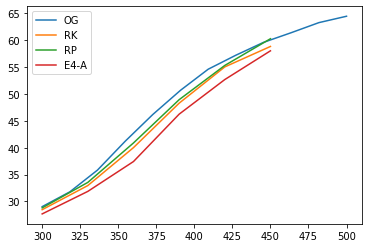

In [42]:
plt.plot(og.temperatures, og.rg()[0], label='OG')
plt.plot(r_k.temperatures, r_k.rg()[0], label='RK')
plt.plot(r_p.temperatures, r_p.rg()[0], label='RP')
plt.plot(e4_f.temperatures, e4_f.rg()[0], label='E4-A')
plt.legend()

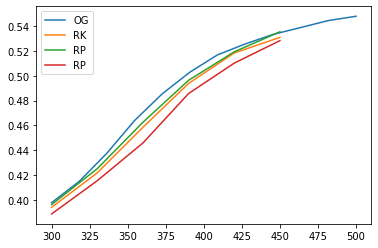

In [43]:
plt.plot(og.temperatures, og.flory_scaling_formula(), label='OG')
plt.plot(r_k.temperatures,r_k.flory_scaling_formula(), label='RK')
plt.plot(r_p.temperatures, r_p.flory_scaling_formula(), label='RP')
plt.plot(e4_f.temperatures, e4_f.flory_scaling_formula(), label='RP')
plt.legend()

In [118]:
dig_asyn = lmp.LMP(md_dir='/home/adria/test/hps_test/digasyn',equil_frames=1000)
myasyn = lmp.LMP(md_dir='/home/adria/test/hps_test/myasyn', equil_frames=1000)
myasyn_re = lmp.LMP(md_dir='/home/adria/test/hps_test/myasyn_re', equil_frames=1000)
myasyn_re2 = lmp.LMP(md_dir='/home/adria/test/hps_test/myasyn_re2', equil_frames=1000)

> Run Completed at 4.94% for None. Ran 49420000 steps for a total of 4943 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
> Run Completed at 5.68% for ASYN. Ran 56790000 steps for a total of 5680 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
> Run Completed at 5.65% for ASYN. Ran 56530000 steps for a total of 5654 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
> Run Completed at 7.55% for None. Ran 75500000 steps for a total of 7551 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations


In [121]:
exp_data = np.genfromtxt('/home/adria/documents/HPS_data.csv', delimiter=',')*10.
print("TARGET", exp_data[:,1][-1],)

TARGET 21.874999999999996


In [122]:
myasyn.rg()[0][0]

21.568778250073063

In [123]:
print(dig_asyn.rg()[0][0])

21.82755176761543


In [124]:
myasyn_re.rg()[0][0]

21.567244612097284

In [125]:
myasyn_re2.rg()[0][0]

21.87816623633217

In [25]:
prots = ['ProTa-N', 'ProTa-C']
Is = np.array([42,42])*10**-3
for i in range(len(prots)):
    print(f"DOING {prots[i]}")
    s = lmpsetup.LMPSetup(oliba_wd=f'/home/adria/test/hps_test/{i}.{prots[i]}',
                     temperatures=[298],
                     ionic_strength=Is[i],
                     protein=prots[i],
                     model='HPS',
                     t=int(1e9),
                     processors=2,
                     chains=1,
                     save=50000)
    s.del_missing_aas()
    s.lammps_ordering()
    s.write_hps_files(qsub=False, silent=True)

DOING ProTa-N
DOING ProTa-C


In [21]:
prots = ['ProTa-N', 'ProTa-C',]
rgs = []
for i in range(1):
    wr = lmp.LMP(md_dir=f'/home/adria/test/hps_test/{i}.{prots[i]}', equil_frames=10)
    rgs.append(wr.rg(full=True)[0]) 
#     print(prots[i], rgs[-1])
# rgs

> Run Completed at 0.01% for None. Ran 50000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations


/home/adria/scripts/md/md/analysis.py:662: RuntimeWarning: Mean of empty slice.
  mean = observable.mean(axis=1)
/home/adria/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/adria/scripts/md/md/analysis.py:669: RuntimeWarning: Mean of empty slice.
  err += (observable[T, rng].mean() - mean[T]) ** 2
/home/adria/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


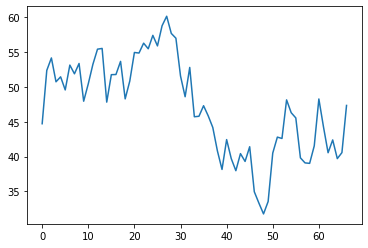

In [122]:
plt.plot(rgs[0][0])

In [64]:
exp_data = np.genfromtxt('/home/adria/documents/HPS_data.csv', delimiter=',')*10.

In [74]:
#DIGNON
exp_data[[2,3],1]

array([24.    , 28.3125])

In [75]:
#EXPERIMENTAL
exp_data[[2,3],0]

array([28.88760807, 37.26188761])

In [99]:
og_data = np.array([-4,-4,-3.5,3-.5,-3,-2,-1.5,-1.0,1,2,2.5,3.5,3.5,5,5,5,6,6.5,7.5,14.5,])
og_data = og_data-og_data.max()
og_data = np.abs(og_data)
og_data/og_data.max()

array([1.        , 1.        , 0.97297297, 0.64864865, 0.94594595,
       0.89189189, 0.86486486, 0.83783784, 0.72972973, 0.67567568,
       0.64864865, 0.59459459, 0.59459459, 0.51351351, 0.51351351,
       0.51351351, 0.45945946, 0.43243243, 0.37837838, 0.        ])

In [24]:
import decimal


kkk = (0.837837999999+0.97297299999)/2
kk2 = round(kkk, 7)
kk3 = deccc = decimal.Decimal(str(kk2)).quantize(decimal.Decimal('0.000001'), 
    rounding=decimal.ROUND_HALF_UP)
print(kkk, kk2, kk3)
deccc = decimal.Decimal(str(kkk*10**6)).quantize(decimal.Decimal('.1'), 
    rounding=decimal.ROUND_HALF_UP)
print(kkk, round(kkk, 7), deccc,)

0.9054054999945 0.9054055 0.905406
0.9054054999945 0.9054055 905405.5


In [18]:
decimal.Decimal(str(905405.5)).quantize(decimal.Decimal('1'), rounding=decimal.ROUND_HALF_UP)

Decimal('905406')

In [66]:
s = lmp.LMP(md_dir='/home/adria/test/hps_test/0.ProTa-N', equil_frames=10)
s.rg()

> Run Completed at 0.13% for None. Ran 1280000 steps for a total of 129 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations


(array([44.01830458]), array([1.82895572]))

In [68]:
s = hmd.HMD(md_dir='/home/adria/irb/hoomd/protan', equil_frames=10)
s.rg()

(array([44.33188965]), array([0.37718101]))

In [96]:
t = lmpsetup.LMPSetup(oliba_wd='/home/adria/test/hps_test/myasyn_re_f',
                  protein='ASYN',
                  chains=1)
t.del_missing_aas()
t.lammps_ordering()
t.write_hps_files()

╔═══════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/test/hps_test/myasyn_re_f for ASYN     ║
║-------------------------------------------------------------------------------║
║   PARAMETERS                                                                  ║
║       - Model = HPS                                                           ║
║       - Chains = 1                                                            ║
║       - Ionic Strength (mM) = 0.1                                             ║
║       - Medium Permittivity = 80.0                                            ║
║       - Temperatures (K) = [300, 320, 340, 360, 380, 400]                     ║
║       - HPS Scale = 1.0                                                       ║
╚═══════════════════════════════════════════════════════════════════════════════╝
